## Data Setup

Library imports
___

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Data import and declaration
___

In [2]:
mcu_csv = pd.read_csv("./mcu_box_office.csv")

In [3]:
mcu = pd.DataFrame(data=mcu_csv)

mcu.head()

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"


Rename columns
___


In [4]:
mcu.columns

Index(['movie_title', 'mcu_phase', 'release_date', 'tomato_meter',
       'audience_score', 'movie_duration', 'production_budget',
       'opening_weekend', 'domestic_box_office', 'worldwide_box_office'],
      dtype='object')

In [5]:
mcu.columns = ['Film', 'Phase', 'Release Date', 'Critical Reception', 'Audience Reception', 'Length', 'Budget', 'Opening Weekend Gross', 'Domestic Gross', 'Worldwide Gross']

In [6]:
mcu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Film                   27 non-null     object
 1   Phase                  27 non-null     int64 
 2   Release Date           27 non-null     object
 3   Critical Reception     27 non-null     int64 
 4   Audience Reception     27 non-null     int64 
 5   Length                 27 non-null     int64 
 6   Budget                 27 non-null     object
 7   Opening Weekend Gross  27 non-null     object
 8   Domestic Gross         27 non-null     object
 9   Worldwide Gross        27 non-null     object
dtypes: int64(4), object(6)
memory usage: 2.2+ KB


Shortening some of the longer titles
___

In [7]:
mcu.at[4,'Film']='Captain America'
mcu.at[8,'Film']='The Winter Soldier'
mcu.at[10,'Film']='Age of Ultron'
mcu.at[12,'Film']='Civil War'
mcu.at[18,'Film']='Infinity War'
mcu.at[21,'Film']='Endgame'
mcu.at[24,'Film']='Shang-Chi'

Setting the index as the Film column
___

In [8]:
mcu=mcu.set_index('Film')

In [9]:
mcu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Iron Man to Spider-Man: No Way Home
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Phase                  27 non-null     int64 
 1   Release Date           27 non-null     object
 2   Critical Reception     27 non-null     int64 
 3   Audience Reception     27 non-null     int64 
 4   Length                 27 non-null     int64 
 5   Budget                 27 non-null     object
 6   Opening Weekend Gross  27 non-null     object
 7   Domestic Gross         27 non-null     object
 8   Worldwide Gross        27 non-null     object
dtypes: int64(4), object(5)
memory usage: 2.1+ KB


In [10]:
mcu

,Phase,Release Date,Critical Reception,Audience Reception,Length,Budget,Opening Weekend Gross,Domestic Gross,Worldwide Gross
Film,,,,,,,,,
Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
Captain America,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"
The Avengers,1,5/4/2012,91,91,143,"225,000,000","207,438,708","623,357,910","1,515,100,211"
Iron Man 3,2,5/3/2013,79,78,130,"200,000,000","174,144,585","408,992,272","1,215,392,272"
Thor: The Dark World,2,11/8/2013,66,75,111,"150,000,000","85,737,841","206,362,140","644,602,516"
The Winter Soldier,2,4/4/2014,90,92,135,"170,000,000","95,023,721","259,746,958","714,401,889"


<AxesSubplot:xlabel='Length', ylabel='Critical Reception'>

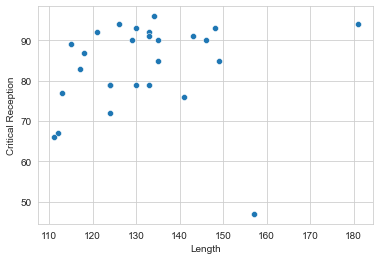

In [11]:
sns.scatterplot(x='Length',y='Critical Reception',data=mcu)

Converting currency values to int for later analysis
___

In [12]:
mcu['Budget'] = mcu['Budget'].replace(',','', regex=True).astype('int')
mcu['Opening Weekend Gross'] = mcu['Opening Weekend Gross'].replace(',','', regex=True).astype('int')
mcu['Domestic Gross'] = mcu['Domestic Gross'].replace(',','', regex=True).astype('int')
mcu['Worldwide Gross'] = mcu['Worldwide Gross'].replace(',','', regex=True).astype('int')

In [13]:
mcu

,Phase,Release Date,Critical Reception,Audience Reception,Length,Budget,Opening Weekend Gross,Domestic Gross,Worldwide Gross
Film,,,,,,,,,
Iron Man,1,5/2/2008,94,91,126,186000000,102118668,318604126,585171547
The Incredible Hulk,1,6/13/2008,67,70,112,137500000,55414050,134806913,265573859
Iron Man 2,1,5/7/2010,72,71,124,170000000,128122480,312433331,621156389
Thor,1,5/6/2011,77,76,113,150000000,65723338,181030624,449326618
Captain America,1,7/22/2011,79,75,124,140000000,65058524,176654505,370569776
The Avengers,1,5/4/2012,91,91,143,225000000,207438708,623357910,1515100211
Iron Man 3,2,5/3/2013,79,78,130,200000000,174144585,408992272,1215392272
Thor: The Dark World,2,11/8/2013,66,75,111,150000000,85737841,206362140,644602516
The Winter Soldier,2,4/4/2014,90,92,135,170000000,95023721,259746958,714401889


Breaking the larger table into smaller tables, based on the phase of the MCU the film belongs to
___

In [14]:
phase1 = mcu[(mcu['Phase'] == 1)]
phase2 = mcu[(mcu['Phase'] == 2)]
phase3 = mcu[(mcu['Phase'] == 3)]
phase4 = mcu[(mcu['Phase'] == 4)]

In [15]:
phase1

,Phase,Release Date,Critical Reception,Audience Reception,Length,Budget,Opening Weekend Gross,Domestic Gross,Worldwide Gross
Film,,,,,,,,,
Iron Man,1,5/2/2008,94,91,126,186000000,102118668,318604126,585171547
The Incredible Hulk,1,6/13/2008,67,70,112,137500000,55414050,134806913,265573859
Iron Man 2,1,5/7/2010,72,71,124,170000000,128122480,312433331,621156389
Thor,1,5/6/2011,77,76,113,150000000,65723338,181030624,449326618
Captain America,1,7/22/2011,79,75,124,140000000,65058524,176654505,370569776
The Avengers,1,5/4/2012,91,91,143,225000000,207438708,623357910,1515100211


In [16]:
phase2

,Phase,Release Date,Critical Reception,Audience Reception,Length,Budget,Opening Weekend Gross,Domestic Gross,Worldwide Gross
Film,,,,,,,,,
Iron Man 3,2,5/3/2013,79,78,130,200000000,174144585,408992272,1215392272
Thor: The Dark World,2,11/8/2013,66,75,111,150000000,85737841,206362140,644602516
The Winter Soldier,2,4/4/2014,90,92,135,170000000,95023721,259746958,714401889
Guardians of the Galaxy,2,8/1/2014,92,92,121,170000000,94320883,333714112,770882395
Age of Ultron,2,5/1/2015,76,83,141,365000000,191271109,459005868,1395316979
Ant-Man,2,7/17/2015,83,85,117,130000000,57225526,180202163,518858449


In [17]:
phase3

,Phase,Release Date,Critical Reception,Audience Reception,Length,Budget,Opening Weekend Gross,Domestic Gross,Worldwide Gross
Film,,,,,,,,,
Civil War,3,5/6/2016,90,89,146,250000000,179139142,408084349,1151918521
Doctor Strange,3,11/4/2016,89,86,115,165000000,85058311,232641920,676354481
Guardians of the Galaxy Vol. 2,3,5/5/2017,85,87,135,200000000,146510104,389813101,869113101
Spider-Man: Homecoming,3,7/7/2017,92,87,133,175000000,117027503,334201140,878346440
Thor: Ragnarok,3,11/3/2017,93,87,130,180000000,122744989,315058289,850482778
Black Panther,3,2/16/2018,96,79,134,200000000,202003951,700059566,1336494321
Infinity War,3,4/27/2018,85,91,149,300000000,257698183,678815482,2048359754
Ant-Man and the Wasp,3,7/6/2018,87,81,118,130000000,75812205,216648740,623144660
Captain Marvel,3,3/8/2019,79,45,124,175000000,153433423,426829839,1129727388


In [18]:
phase4

,Phase,Release Date,Critical Reception,Audience Reception,Length,Budget,Opening Weekend Gross,Domestic Gross,Worldwide Gross
Film,,,,,,,,,
Black Widow,4,7/9/2021,79,91,133,200000000,80366312,183651655,379751655
Shang-Chi,4,9/3/2021,91,98,133,150000000,75388688,224543292,432243292
Eternals,4,11/5/2021,47,78,157,200000000,71297219,164870264,402064929
Spider-Man: No Way Home,4,12/17/2021,93,98,148,200000000,260138569,803975784,1891108035


Since the tables are all based on which phase the film was released in, we don't need the `phase` column anymore
___

In [19]:
phase1 = phase1.drop("Phase",axis=1)
phase2 = phase2.drop("Phase",axis=1)
phase3 = phase3.drop("Phase",axis=1)
phase4 = phase4.drop("Phase",axis=1)

In [20]:
phase1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Iron Man to The Avengers
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Release Date           6 non-null      object
 1   Critical Reception     6 non-null      int64 
 2   Audience Reception     6 non-null      int64 
 3   Length                 6 non-null      int64 
 4   Budget                 6 non-null      int64 
 5   Opening Weekend Gross  6 non-null      int64 
 6   Domestic Gross         6 non-null      int64 
 7   Worldwide Gross        6 non-null      int64 
dtypes: int64(7), object(1)
memory usage: 432.0+ bytes


# Fuckin about

Let's visualize audience vs. critical reaction to each movie
___

In [21]:
p1 = phase1.drop(["Release Date","Length","Budget"], axis=1)
p2 = phase2.drop(["Release Date","Length","Budget"], axis=1)
p3 = phase3.drop(["Release Date","Length","Budget"], axis=1)
p4 = phase4.drop(["Release Date","Length","Budget"], axis=1)

p1

,Critical Reception,Audience Reception,Opening Weekend Gross,Domestic Gross,Worldwide Gross
Film,,,,,
Iron Man,94,91,102118668,318604126,585171547
The Incredible Hulk,67,70,55414050,134806913,265573859
Iron Man 2,72,71,128122480,312433331,621156389
Thor,77,76,65723338,181030624,449326618
Captain America,79,75,65058524,176654505,370569776
The Avengers,91,91,207438708,623357910,1515100211


In [52]:
def p1Reception():
    p1Film = p1.index.values
    p1Crit = p1['Critical Reception']
    p1Aud = p1['Audience Reception']
    x_axis = np.arange(len(p1Film))

    plt.figure(figsize=(12,6))
    plt.bar(x_axis-0.2, p1Crit, 0.4, label = 'Critical')
    plt.bar(x_axis+0.2, p1Aud, 0.4, label = 'Audience')

    plt.xticks(x_axis, p1Film)
    plt.xlabel('Films')
    plt.ylabel('Reception')
    plt.yticks(range(0, 100, 10))
    plt.title('Reception of Phase 1')
    plt.legend()
    plt.show()

In [64]:
def p2Reception():
    p2Film = p2.index.values
    p2Crit = p2['Critical Reception']
    p2Aud = p2['Audience Reception']
    x_axis = np.arange(len(p2Film))

    plt.figure(figsize=(12,6))
    plt.bar(x_axis-0.2, p2Crit, 0.35, label = 'Critical')
    plt.bar(x_axis+0.2, p2Aud, 0.35, label = 'Audience')

    plt.xticks(x_axis, p2Film)
    plt.xlabel('Films')
    plt.ylabel('Reception')
    plt.yticks(range(0, 100, 10))
    plt.title('Reception of Phase 1')
    plt.legend()
    plt.show()

In [74]:
def p3Reception():
    p3Film = p3.index.values
    p3Crit = p3['Critical Reception']
    p3Aud = p3['Audience Reception']
    x_axis = np.arange(len(p3Film))

    plt.figure(figsize=(25,10))
    plt.bar(x_axis-0.2, p3Crit, 0.35, label = 'Critical')
    plt.bar(x_axis+0.2, p3Aud, 0.35, label = 'Audience')

    plt.xticks(x_axis, p3Film)
    plt.xlabel('Films')
    plt.ylabel('Reception')
    plt.yticks(range(0, 100, 10))
    plt.title('Reception of Phase 1')
    plt.legend()
    plt.show()

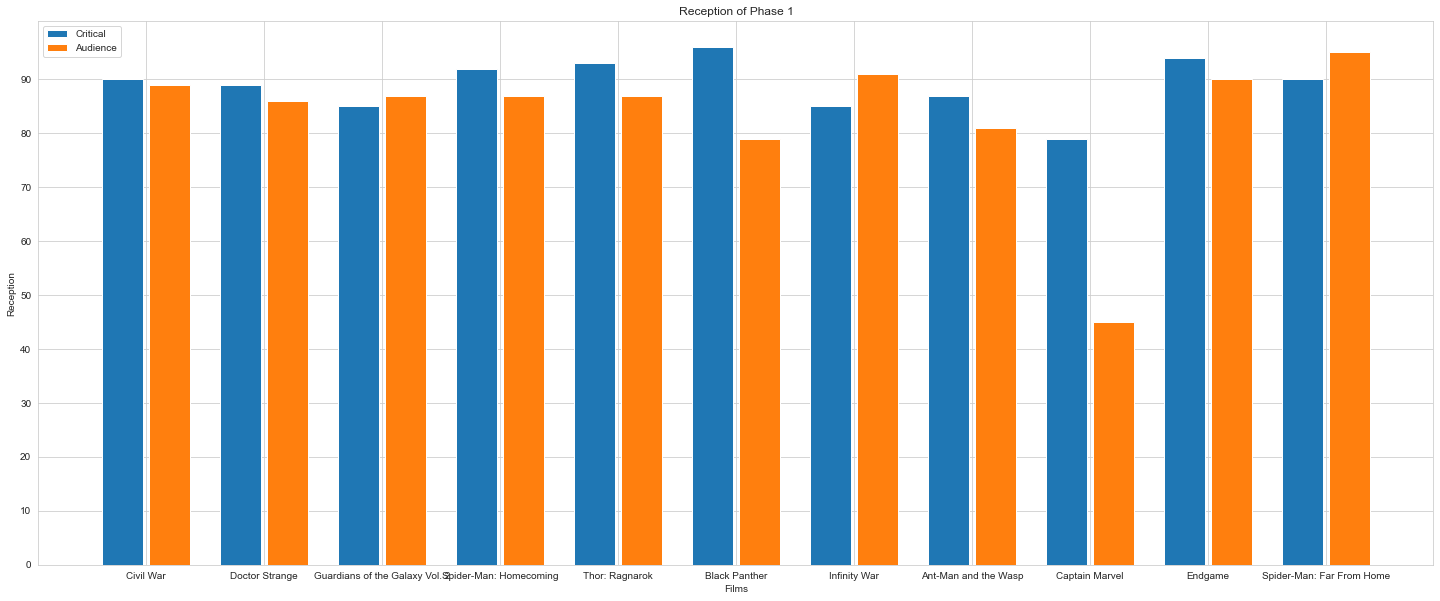

In [75]:
p3Reception()